In [61]:
import numpy as np
from numpy.linalg import svd
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option('expand_frame_repr', False)

In [62]:
class OrthRepresent(PCA):
    
    '''
    
    OrthRepresent类继承自PCA类，先对X进行线性变换，使之正交于T，再对X进行PCA分解（可选），得到最终的特征
    
    apply_pca: 是否使用主成分分析（默认使用）
    n_components: 使用主成分分析时保留的主成分数量
    
    '''

    def __init__(self, apply_pca=True, n_components=None, *, copy=True, whiten=False, svd_solver="auto", tol=0, iterated_power="auto", random_state=None):
        if apply_pca:
            super().__init__(n_components, copy=copy, whiten=whiten, svd_solver=svd_solver, tol=tol, iterated_power=iterated_power, random_state=random_state)
        self.W = None
        self.apply_pca = apply_pca
        
    def fit(self, X, T, y=None):
        if len(T.shape) == 1:
            T = T.reshape(-1, 1)
        T_ = T - T.mean(axis=0)
        X_ = X - X.mean(axis=0)
        _, S, VT = svd(T_.T@X_)
        self.W = VT[(S > 0).sum():].T
        if self.apply_pca:
            return super().fit(X@self.W, y)
        else:
            return None

    def transform(self, X):
        if self.apply_pca:
            return super().transform(X@self.W)
        else:
            return X@self.W
    
    def fit_transform(self, X, T, y=None):
        if len(T.shape) == 1:
            T = T.reshape(-1, 1)
        T_ = T - T.mean(axis=0)
        X_ = X - X.mean(axis=0)
        _, S, VT = svd(T_.T@X_)
        self.W = VT[(S > 0).sum():].T
        if self.apply_pca:
            return super().fit_transform(X@self.W, y)
        else:
            return X@self.W

In [63]:
# 使用真实数据的 X 和 T 进行实验

df = pd.read_csv('../data/feature_new.csv')
df = df.dropna(axis=0)
df = df.sort_values(by=['city_id', 'dt'])
drop_columns = ['dt', 'group_type_exp', 'group_type_blank', 'sample_size_blank', 'sample_size_exp', 
                'snpc_fkdp_subsidy_hufan_ratio_3d', 'snpc_fkdp_subsidy_hufan_ratio_14d_term']
T_columns = ['pk_hufan_rate_exp', 'th_hufan_rate_exp', 'fk_hufan_rate_exp', 
             'fk_subsidy_exp', 'fk_subsidy_exp.1',
             'pk_hufan_rate_blank', 'th_hufan_rate_blank', 'fk_hufan_rate_blank', 
             'delta_pk_rate', 'delta_th_rate', 'delta_hufan_rate', 
             'kh_sub_rate',
             'pk_target_c_rate', 'th_target_c_rate', 'fk_target_rate'] # 有缺失值
Y_columns = ['wyc_gmv', 'kuaiche_gmv', 'tehui_gmv', 'fk_gmv',
             'pk_gmv_exp', 'th_gmv_exp', 'fk_gmv_exp', 'wc_gmv_exp', 'wyc_gmv_exp', 'wc_gmv_exp.1', 'wyc_gmv_exp.1',
             'pk_gmv_blank', 'th_gmv_blank', 'fk_gmv_blank', 
             'dgmv_ratio_pk', 'dgmv_ratio_th', 'dgmv_ratio', 
             'real_roi']
feature_columns = list(set(df.columns) - set(drop_columns + T_columns + Y_columns))
X = df[feature_columns].values # 使用真实数据的 X
T = df[T_columns].values # 使用真实数据的 T
OR = OrthRepresent(n_components=50) # 取前50个主成分
X_ = OR.fit_transform(X, T)
print(f'X.shape={X.shape}, T.shape={T.shape}, X_.shape={X_.shape}')

X.shape=(42670, 339), T.shape=(42670, 15), X_.shape=(42670, 50)


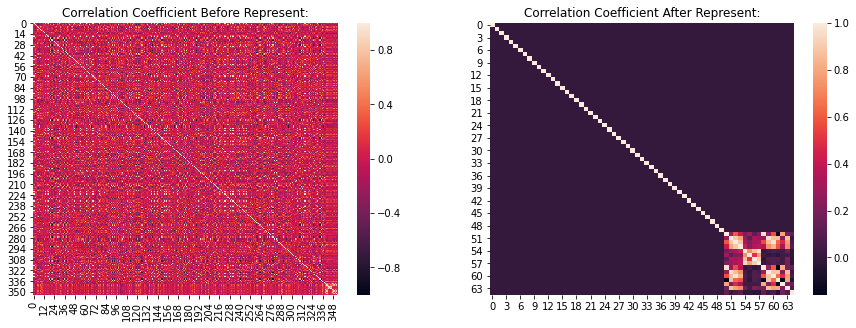

In [64]:
# 表征前后 X 和 T 的相关系数

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
p1 = sns.heatmap(np.corrcoef(X.T, T.T), ax=ax[0])
p1.set_title('Correlation Coefficient Before Represent:')
p2 = sns.heatmap(np.corrcoef(X_.T, T.T), ax=ax[1])
p2.set_title('Correlation Coefficient After Represent:')
plt.show()

# 从图中可以看出，正交化后 X 和 T 的相关系数为 0

In [65]:
# 使用真实数据的 X 和人为制造的分组 0 1 变量 T 进行实验

df = pd.read_csv('../data/feature_new.csv')
df = df.dropna(axis=0)
df = df.sort_values(by=['city_id', 'dt'])
drop_columns = ['dt', 'group_type_exp', 'group_type_blank', 'sample_size_blank', 'sample_size_exp', 
                'snpc_fkdp_subsidy_hufan_ratio_3d', 'snpc_fkdp_subsidy_hufan_ratio_14d_term']
T_columns = ['pk_hufan_rate_exp', 'th_hufan_rate_exp', 'fk_hufan_rate_exp', 
             'fk_subsidy_exp', 'fk_subsidy_exp.1',
             'pk_hufan_rate_blank', 'th_hufan_rate_blank', 'fk_hufan_rate_blank', 
             'delta_pk_rate', 'delta_th_rate', 'delta_hufan_rate', 
             'kh_sub_rate',
             'pk_target_c_rate', 'th_target_c_rate', 'fk_target_rate'] # 有缺失值
Y_columns = ['wyc_gmv', 'kuaiche_gmv', 'tehui_gmv', 'fk_gmv',
             'pk_gmv_exp', 'th_gmv_exp', 'fk_gmv_exp', 'wc_gmv_exp', 'wyc_gmv_exp', 'wc_gmv_exp.1', 'wyc_gmv_exp.1',
             'pk_gmv_blank', 'th_gmv_blank', 'fk_gmv_blank', 
             'dgmv_ratio_pk', 'dgmv_ratio_th', 'dgmv_ratio', 
             'real_roi']
feature_columns = list(set(df.columns) - set(drop_columns + T_columns + Y_columns))
X = df[feature_columns].values # 使用真实数据的 X
T = (df['fkdp_night_peak_success_rate_14d_term'] < df['fkdp_night_peak_success_rate_14d_term'].mean()).astype('int').values # T设置为0、1变量，且与第一个特征有相关性
OR = OrthRepresent(n_components=50)  # 取前50个主成分
X_ = OR.fit_transform(X, T)
print(f'X.shape={X.shape}, T.shape={T.shape}, X_.shape={X_.shape}')

X.shape=(42670, 339), T.shape=(42670,), X_.shape=(42670, 50)


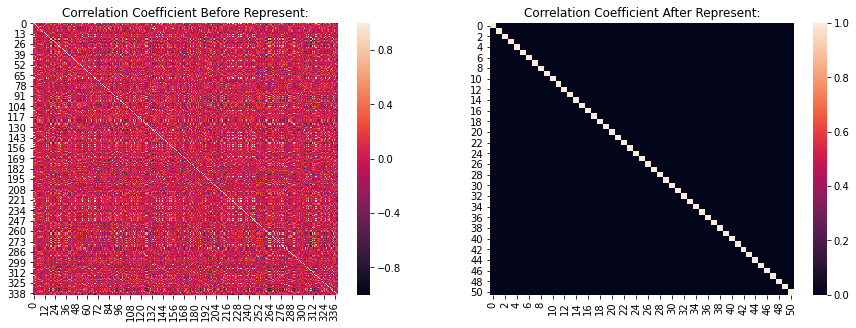

In [66]:
# 表征前后 X 和 T 的相关系数

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
p1 = sns.heatmap(np.corrcoef(X.T, T.T), ax=ax[0])
p1.set_title('Correlation Coefficient Before Represent:')
p2 = sns.heatmap(np.corrcoef(X_.T, T.T), ax=ax[1])
p2.set_title('Correlation Coefficient After Represent:')
plt.show()

# 从图中可以看出，正交化后 X 和 T 的相关系数为0

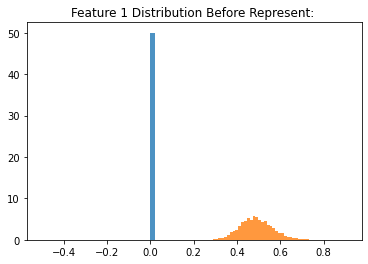

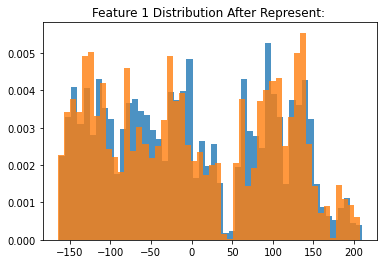

In [67]:
# 表征前后的第一个特征的对照组分布（橙）和实验组分布（蓝）

X1 = X[T == 1]
X2 = X[T == 0]
plt.hist(X1[:, 0], bins=50, density=True, alpha=0.8)
plt.hist(X2[:, 0], bins=50, density=True, alpha=0.8)
plt.title('Feature 1 Distribution Before Represent: ')
plt.show()

X1 = X_[T == 1]
X2 = X_[T == 0]
plt.hist(X1[:, 0], bins=50, density=True, alpha=0.8)
plt.hist(X2[:, 0], bins=50, density=True, alpha=0.8)
plt.title('Feature 1 Distribution After Represent: ')
plt.show()

# 从图中可以看出，正交化后对照组和实验组的分布趋于一致，说明平衡分布等价于正交化

In [68]:
# 使用人为制造的强相关的 X 和分组 0 1 变量 T 进行实验

size = 1000000

T = np.random.randint(0, 2, size) # 随机生成 0 1 组成的 T
X1 = 10*T + 10 + np.random.randn(size)
X2 = 20*T*np.log(T + 100) + 10*np.random.randn(size)
X3 = 3*np.exp(T - 2) + 0.1*np.random.randn(size)
X = np.concatenate((X1, X2, X3)).reshape(3, -1).T # 人为制造一些和 T 相关的 X 

OR = OrthRepresent() # 取全部主成分
X_ = OR.fit_transform(X, T)

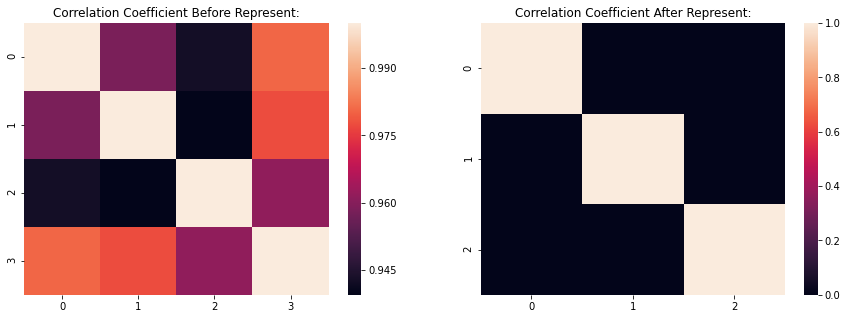

In [69]:
# 表征前后 X 和 T 的相关系数

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
p1 = sns.heatmap(np.corrcoef(X.T, T.T), ax=ax[0])
p1.set_title('Correlation Coefficient Before Represent:')
p2 = sns.heatmap(np.corrcoef(X_.T, T.T), ax=ax[1])
p2.set_title('Correlation Coefficient After Represent:')
plt.show()

# 从图中可以看出，正交化后 X 和 T 的相关系数为 0

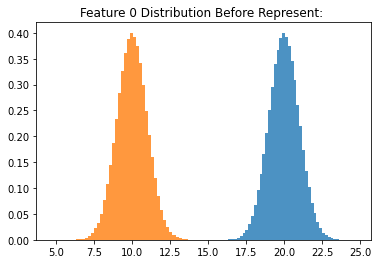

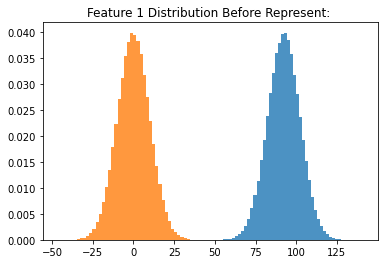

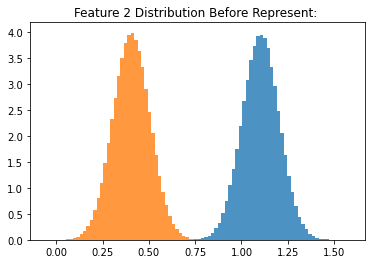

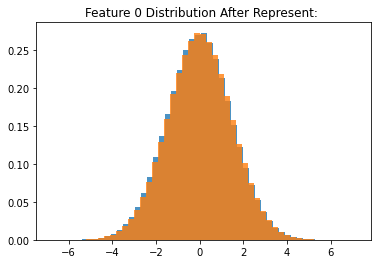

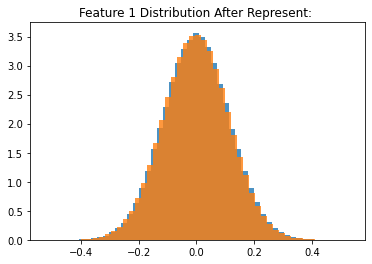

In [70]:
# 表征前后的所有特征的对照组分布（橙）和实验组分布（蓝）

for i in range(X.shape[1]):
    plt.hist(X[:, i][T == 1], bins=50, density=True, alpha=0.8)
    plt.hist(X[:, i][T == 0], bins=50, density=True, alpha=0.8)
    plt.title(f'Feature {i} Distribution Before Represent: ')
    plt.show()

for i in range(X_.shape[1]):
    plt.hist(X_[:, i][T == 1], bins=50, density=True, alpha=0.8)
    plt.hist(X_[:, i][T == 0], bins=50, density=True, alpha=0.8)
    plt.title(f'Feature {i} Distribution After Represent: ')
    plt.show()

# 从图中可以看出，正交化后对照组和实验组的分布趋于一致，说明平衡分布等价于正交化